## Upload Data:

In [1]:
import re
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
import pandas as pd

In [2]:
!kaggle datasets download -d gpreda/covid19-tweets

Dataset URL: https://www.kaggle.com/datasets/gpreda/covid19-tweets
License(s): CC0-1.0
covid19-tweets.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
# prompt: save the data into a df variable (the data is a zip)

!unzip -o covid19-tweets.zip
data = pd.read_csv('covid19_tweets.csv')
data.head()

Archive:  covid19-tweets.zip
  inflating: covid19_tweets.csv      


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [4]:
data.isna().any()

user_name           False
user_location        True
user_description     True
user_created        False
user_followers      False
user_friends        False
user_favourites     False
user_verified       False
date                False
text                False
hashtags             True
source               True
is_retweet          False
dtype: bool

In [5]:
data.dropna(subset=['user_name', 'user_description', 'text'])

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False


In [6]:
data.shape

(179108, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_name         179108 non-null  object
 1   user_location     142337 non-null  object
 2   user_description  168822 non-null  object
 3   user_created      179108 non-null  object
 4   user_followers    179108 non-null  int64 
 5   user_friends      179108 non-null  int64 
 6   user_favourites   179108 non-null  int64 
 7   user_verified     179108 non-null  bool  
 8   date              179108 non-null  object
 9   text              179108 non-null  object
 10  hashtags          127774 non-null  object
 11  source            179031 non-null  object
 12  is_retweet        179108 non-null  bool  
dtypes: bool(2), int64(3), object(8)
memory usage: 15.4+ MB


In [8]:
posts_threshold = int(data.groupby('user_name').user_created.count().quantile(0.9))
filtered_data = data.groupby('user_name').filter(lambda x: len(x) >= 10)
print(filtered_data.shape)

(41861, 13)


In [9]:
sample_ids = filtered_data['user_name'].unique()
np.random.seed(42)
np.random.shuffle(sample_ids)
sample_ids = sample_ids[:1000]
sample_data = filtered_data[filtered_data['user_name'].isin(sample_ids)]
sample_data = sample_data.reset_index(drop=True)
print(sample_data.shape)
sample_data.head()

(25943, 13)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,DailyaddaaNews,New Delhi,Breaking news alerts from India.,2016-10-22 09:18:42,546,29,88,False,2020-07-25 12:26:46,Rajasthan Government today started a Plasma Ba...,NaN,Twitter Web App,False
1,APO Group English,#AFRICA #MENA,Latest #Africa & #MENA related #News releases ...,2011-02-22 09:09:45,10661,6,2037,True,2020-07-25 12:26:31,Coronavirus - South Africa: COVID-19 update fo...,NaN,Africa Newsroom,False
2,Micah Pollak,Northwest Indiana,Associate Professor of Economics (PhD in Econo...,2011-07-22 13:41:42,751,183,1308,False,2020-07-25 12:26:31,"@JimBnntt Your image doesn't list a source, bu...",NaN,Twitter Web App,False
3,TOI Delhi,"New Delhi, India",Your city. Your neighborhood. Your block. Cove...,2009-04-13 13:00:35,52186,41,74,True,2020-07-25 12:25:49,"#Delhi reports 1,142 #COVID19 positive cases a...","['Delhi', 'COVID19']",TweetDeck,False
4,APN NEWS,"A-009, SEC-68 , NOIDA",APN NEWS: खबर है तो दिखेगी… Follow us for brea...,2014-05-13 09:10:18,20262,14,1487,False,2020-07-25 12:25:35,Testing per 10 lakh population in Jammu and Ka...,NaN,Twitter Web App,False


## Doc2Vec on text:

In [10]:
from gensim.utils import simple_preprocess
sample_data.loc[:, 'tokenized'] = sample_data['text'].apply(simple_preprocess)

In [11]:
def user_vector(list_of_tokens, model):
    return sum(model.infer_vector(tokens) for tokens in list_of_tokens) / len(list_of_tokens)

In [12]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
from nltk.tokenize import word_tokenize
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
nltk.download('punkt')

# Prepare documents
tagged_data = [TaggedDocument(words=text, tags=[str(i)]) for i, text in enumerate(sample_data['tokenized'])]

# Train Doc2Vec model
vector_size = 1000
model = Doc2Vec(vector_size=vector_size, window=3, min_count=10, workers=4, epochs=35)
model.build_vocab(tagged_data)
model.train(tagged_data, total_examples=model.corpus_count, epochs=model.epochs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Combining Other Features:

In [13]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from scipy.spatial.distance import cosine
from gensim.models import Word2Vec

In [14]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from gensim.models import Word2Vec
from scipy.spatial.distance import cosine

def preprocess_features(df):
    # Create a copy of the dataframe to avoid fragmentation warnings
    df = df.copy()

    # Convert date to numerical (days since the earliest date)
    df['date'] = pd.to_datetime(df['date'])
    df['days_since_start'] = (df['date'] - df['date'].min()).dt.days

    # Process hashtags
    def process_hashtags(x):
        if isinstance(x, str):
            try:
                return eval(x)
            except:
                return []
        elif isinstance(x, list):
            return x
        else:
            return []

    df['hashtags_list'] = df['hashtags'].apply(process_hashtags)
    df['hashtags_count'] = df['hashtags_list'].apply(len)

    # Train Word2Vec model on hashtags
    hashtags_corpus = [tags for tags in df['hashtags_list'] if tags]  # Remove empty lists
    if hashtags_corpus:
        hashtag_model = Word2Vec(hashtags_corpus, vector_size=100, window=5, min_count=1, workers=4)

        # Create hashtag embeddings for each tweet
        df['hashtag_embedding'] = df['hashtags_list'].apply(
            lambda x: np.mean([hashtag_model.wv[tag] for tag in x if tag in hashtag_model.wv] or [np.zeros(100)], axis=0)
        )
    else:
        print("Warning: No hashtags found. Setting hashtag embeddings to zero vectors.")
        df['hashtag_embedding'] = [np.zeros(100)] * len(df)

    # Convert is_retweet to numerical
    df['is_retweet_num'] = df['is_retweet'].astype(int)

    return df

# Preprocess the features
sample_data = preprocess_features(sample_data)

# The rest of your code remains the same...

In [15]:
# Group by user and aggregate features
users_grouped = sample_data.groupby('user_name').agg({
    'tokenized': list,
    'days_since_start': 'mean',
    'hashtags_count': 'mean',
    'hashtag_embedding': lambda x: np.mean(x.tolist(), axis=0),
    'is_retweet_num': 'mean',
    'source': lambda x: list(set(x))  # Keep all unique sources for each user
})

In [16]:
# Calculate Doc2Vec vectors
users_grouped['vector'] = users_grouped['tokenized'].apply(user_vector, args=(model,))

In [17]:
# Prepare source data for similarity calculation
all_sources = list(set(source for sources in users_grouped['source'] for source in sources))
source_dict = {source: i for i, source in enumerate(all_sources)}

def source_vector(sources):
    vec = np.zeros(len(all_sources))
    for source in sources:
        vec[source_dict[source]] = 1
    return vec

users_grouped['source_vector'] = users_grouped['source'].apply(source_vector)

In [18]:
# Combine features
doc2vec_vectors = np.vstack(users_grouped['vector'].values)
hashtag_embeddings = np.vstack(users_grouped['hashtag_embedding'].values)
source_vectors = np.vstack(users_grouped['source_vector'].values)
other_features = users_grouped[['days_since_start', 'hashtags_count', 'is_retweet_num']].values

# Normalize numerical features
scaler = StandardScaler()
other_features_normalized = scaler.fit_transform(other_features)

# Combine all features
combined_features = np.hstack([
    doc2vec_vectors,
    hashtag_embeddings,
    source_vectors,
    other_features_normalized
])

## Similarity Between Users:

In [19]:
# Calculate new similarity matrix
def cosine_similarity_matrix(X):
    return 1 - np.array([[cosine(a, b) for b in X] for a in X])

combined_similarity_matrix = cosine_similarity_matrix(combined_features)

In [20]:
# Update the recommend_users function
def recommend_users(user_id, n=5):
    user_index = list(users_grouped.index).index(user_id)
    similarities = combined_similarity_matrix[user_index]
    similar_indices = similarities.argsort()[-n-1:-1][::-1]
    similar_users = [users_grouped.index[i] for i in similar_indices]
    return [(user, similarities[i]) for i, user in zip(similar_indices, similar_users) if user != user_id]


In [21]:
# Example usage
example_user = users_grouped.index[np.random.randint(users_grouped.shape[0])]
recommendations = recommend_users(example_user)
print(f"Top 5 recommended users for user {example_user}:")
for user, similarity in recommendations:
    print(f"User {user}: Similarity {similarity:.2f}")

Top 5 recommended users for user SCMP News:
User shinyps1: Similarity 0.82
User Khaleej Times: Similarity 0.81
User T-House: Similarity 0.80
User davie ewan macdonald: Similarity 0.79
User mmnjug™: Similarity 0.79


In [22]:
for i in sample_data[sample_data['user_name'] == "Matthew Rimmer"]['text']:
    print(i)
    print('-'*30)

Craftivism - A group of Beenleigh residents are working together to sew thousands of handmade masks to send to Vict… https://t.co/rE1DkyAsZS
------------------------------
A Collection of Scholars and Public Interest Organizations Back Internet Archive’s Defense of Digital Lending… https://t.co/incC7vBqzJ
------------------------------
'Nick Cave’s performance in an empty hall, with just piano and voice, seems to try and ward off the terrifying sile… https://t.co/2k9c1oXW5k
------------------------------
Give peace a chance... @InternetArchive founder @Brewster_Kahle urged the four major publishers suing over the orga… https://t.co/U8jCtjRWoW
------------------------------
"Seek advice from elderly wizards, witches and warlocks only by enchanted mirror or zoom call" @tomgauld on fantasy… https://t.co/yiGg94WKNW
------------------------------
See also - The world needs a 'people's vaccine' for coronavirus, not a big-pharma monopoly | @HelenClarkNZ and… https://t.co/Es9Xy067rL
----------

In [23]:
sample_data[sample_data['user_name'] == 'The Warrior Factor'].iloc[0]['text']

"The latest mask moron is Miami mayor Francis Suarez, who advises wearing masks at home. No, that won't stop transmi… https://t.co/uNgRrYvFys"

## Visualization:

In [24]:
# features = pd.DataFrame(users_grouped['vector'].to_list(), columns=[f'x{i}' for i in range(vector_size)], index=users_grouped.index)

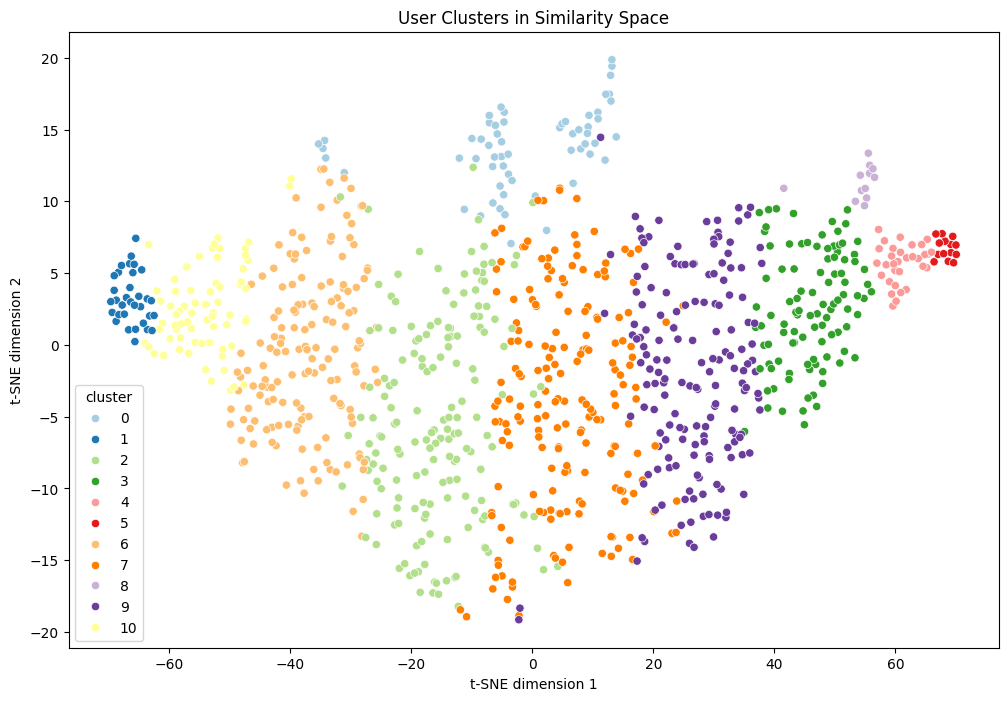

In [25]:
import numpy as np
import pandas as pd
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Combine all features for visualization
combined_features = np.hstack([
    np.vstack(users_grouped['vector'].values),
    np.vstack(users_grouped['hashtag_embedding'].values),
    users_grouped['source_vector'].tolist(),
    users_grouped[['days_since_start', 'hashtags_count', 'is_retweet_num']].values
])

# Perform K-means clustering
kmeans = KMeans(n_clusters=11, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(combined_features)

# Perform t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
user_profile_2d = tsne.fit_transform(combined_features)

# Create a DataFrame with the t-SNE results and cluster labels
viz_df = pd.DataFrame({
    'x': user_profile_2d[:, 0],
    'y': user_profile_2d[:, 1],
    'cluster': cluster_labels,
    'user_id': users_grouped.index  # Use the index of users_grouped as user_id
})

# Convert RGB tuples to hex codes
palette = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c',
           '#fdbf6f', '#ff7f00', '#cab2d6', '#6a3d9a', '#ffff99', '#b15928']

plt.figure(figsize=(12, 8))
sns.scatterplot(data=viz_df, x='x', y='y', hue='cluster', palette=palette[:11], legend='full')
plt.title('User Clusters in Similarity Space')
plt.xlabel('t-SNE dimension 1')
plt.ylabel('t-SNE dimension 2')

# Optionally, annotate points with user IDs
# for i, row in viz_df.iterrows():
#     plt.annotate(row['user_id'], (row['x'], row['y']), xytext=(5, 5), textcoords='offset points', fontsize=8, alpha=0.7)

plt.show()

In [26]:
list(sns.color_palette())

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]